In [57]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

# Boyer-Moore String Search Algorithm

La cadena-algoritmo de búsqueda de Boyer-Moore es un eficiente algoritmo de búsqueda de caracteres. Fue desarrollado por Robert S. Boyer y J Strother Moore en 1977.  El algoritmo preprocesa la cadena que se busca (el patrón), pero no la cadena en la que se busca (el texto). Por lo tanto, es adecuado para aplicaciones en las que el patrón es mucho más corto que el texto o donde persiste en múltiples búsquedas.En general, el algoritmo se ejecuta más rápido a medida que aumenta la longitud del patrón. Las características clave del algoritmo son hacer coincidir la cola del patrón en lugar de la cabeza, y saltar a lo largo del texto en saltos de varios caracteres en lugar de buscar todos los caracteres del texto. Tal como se muestra en el siguiente gif:




![SegmentLocal](boyerMoore.gif)

El algoritmo de Boyer-Moore busca apariciones de P en T realizando comparaciones explícitas de caracteres en diferentes alineaciones. El algoritmo comienza en la alineación k=n, Por lo que el inicio de P está alineado con el inicio de T . Los caracteres en P y T se comparan entonces comenzando en el índice n en P y K en T , se mueve hacia atrás. Las comparaciones continúan hasta que se alcanza el comienzo de P (lo que significa que hay una coincidencia) o se produce una falta de coincidencia en la que la alineación se desplaza hacia adelante (hacia la derecha) de acuerdo con el valor máximo permitido por una serie de reglas. Las comparaciones se realizan de nuevo en la nueva alineación y el proceso se repite hasta que la alineación se desplaza más allá del final de T

In [ ]:
NO_OF_CHARS = 256

def badCharHeuristic(string, size):
	badChar = [-1]*NO_OF_CHARS

	for i in range(size):
		badChar[ord(string[i])] = i;

	return badChar

@timer_func
def boyer_moore_search(txt, pat):

	patternFound = []

	m = len(pat)
	n = len(txt)

	badChar = badCharHeuristic(pat, m)

	s = 0
	while(s <= n-m):
		j = m-1

		while j>=0 and pat[j] == txt[s+j]:
			j -= 1

		if j<0:
			#print("Pattern occur at shift = {}".format(s))
			patternFound.append(s)
			s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
		else:
			s += max(1, j-badChar[ord(txt[s+j])])


	return patternFound

### LETS WRITE A SIMPLE TEST CASE

In [ ]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()

In [ ]:
a  = boyer_moore_search(data,"aliquam")

In [ ]:
print(len(a[0]), "occurrences found in the text")

### Runtime For Boyer-Moore

In [ ]:
# We are going to search the next list of words in the text using Boyer-Moore algorithm
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

In [ ]:
runtime = []
for i in wordSearchList:
	print('Searching for: ',i)
	search = boyer_moore_search(data,i)
	runtime.append(search[1])

In [ ]:
print(runtime)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

In [ ]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [ ]:
print(runtime)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

In [ ]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

In [ ]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,7.295260e+11
1,4.389321e+11
2,3.289889e+11
3,4.090482e+11
4,5.136030e+11
...,...
71,3.199819e+11
72,2.142409e+11
73,2.024090e+11
74,1.798038e+11


<AxesSubplot: >

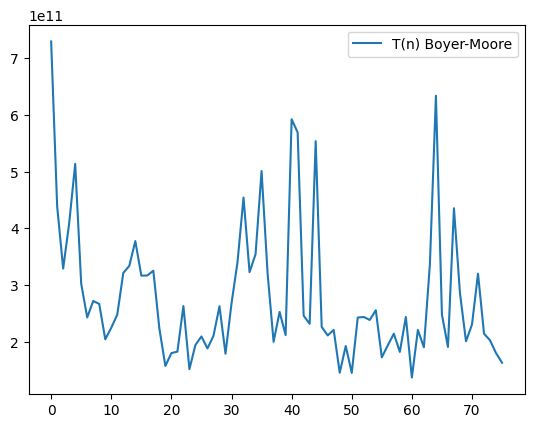

In [66]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.